In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

C:\Users\wlade\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
face_tracker = load_model('face_tracker.h5')
emotion_reader = load_model('emotion_reader.h5')

In [3]:
emotion_dict = {
    'angry':0,
    'disgusted':1,
    'fearful':2,
    'happy':3,
    'neutral':4,
    'sad':5,
    'surprised':6
}

In [4]:
num_to_emotion = {emotion_dict[emotion]: emotion for emotion in emotion_dict}

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = face_tracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[0]
    new_coords=(450*sample_coords).astype(int)
    
    cut = frame[new_coords[1]:new_coords[3],new_coords[0]:new_coords[2]]
    resized_face = tf.image.resize(cut, (48,48))
    grayscale = tf.image.rgb_to_grayscale(resized_face)
    grayscale3d = tf.image.grayscale_to_rgb(grayscale).numpy().astype(int)
    emotions_vec = emotion_reader.predict(tf.data.Dataset.from_tensor_slices([[grayscale3d]]))
    emotion = num_to_emotion[np.argmax(emotions_vec)]
    
    # Controls the main rectangle
    cv2.rectangle(frame, 
                  tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                        (255,0,0), 2)
    # Controls the label rectangle
    cv2.rectangle(frame, 
                  tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                [0,-30])),
                  tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                [80,0])), 
                        (255,0,0), -1)

    # Controls the text rendered
    cv2.putText(frame, emotion, tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                           [0,-5])),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(10) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 28ms/step


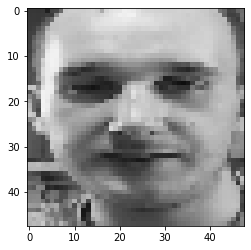

In [6]:
plt.imshow(grayscale3d)

In [28]:
emotions_vec

array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [15]:
grayscale3d.

<tf.Tensor: shape=(48, 48, 3), dtype=float32, numpy=
array([[[142.6017  , 142.6017  , 142.6017  ],
        [146.2712  , 146.2712  , 146.2712  ],
        [ 22.958883,  22.958883,  22.958883],
        ...,
        [154.62392 , 154.62392 , 154.62392 ],
        [156.91235 , 156.91235 , 156.91235 ],
        [159.0731  , 159.0731  , 159.0731  ]],

       [[148.88884 , 148.88884 , 148.88884 ],
        [ 19.936441,  19.936441,  19.936441],
        [ 17.339844,  17.339844,  17.339844],
        ...,
        [153.58495 , 153.58495 , 153.58495 ],
        [158.57906 , 158.57906 , 158.57906 ],
        [157.65579 , 157.65579 , 157.65579 ]],

       [[ 35.06516 ,  35.06516 ,  35.06516 ],
        [ 23.525969,  23.525969,  23.525969],
        [ 17.23571 ,  17.23571 ,  17.23571 ],
        ...,
        [ 89.01337 ,  89.01337 ,  89.01337 ],
        [156.12521 , 156.12521 , 156.12521 ],
        [159.0731  , 159.0731  , 159.0731  ]],

       ...,

       [[ 67.55592 ,  67.55592 ,  67.55592 ],
        [ 57.15